## <center> Titanic - Data Preprocessing and Visualization </center>

### Import des libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


### Chargement des données

In [44]:
# Charger les données
train_data = pd.read_csv("train.csv")

# Afficher les 5 premières lignes des données
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## <center> Visualize and preprocess train data </center>

### Describe data

In [45]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Columns

In [46]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Data type of each column

In [47]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Données manquantes

1) Pour chaque colonne du jeu de données, comptez le nombre de données manquantes. Utilisez pour cela la fonction "dataframe[colonne].isnull().sum()

In [48]:
column_names = train_data.columns
for column in column_names:
    print(column + ' - ' + str(train_data[column].isnull().sum()))

PassengerId - 0
Survived - 0
Pclass - 0
Name - 0
Sex - 0
Age - 177
SibSp - 0
Parch - 0
Ticket - 0
Fare - 0
Cabin - 687
Embarked - 2


Qu'observez-vous ?

<AxesSubplot:>

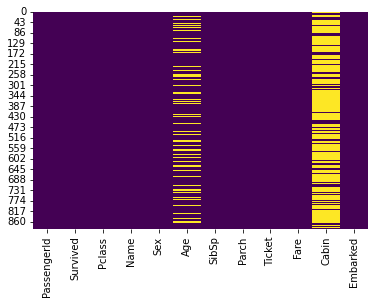

In [49]:
sns.heatmap(train_data.isnull(), cmap='viridis', cbar=False)

### Insights
- 'Survived' est la colonne/variable cible.
- 'PassengerId', 'Name' et 'Ticket' ne contribuent pas à la variable cible 'Survived'. Nous pouvons donc les supprimer des données.
- 'Age' et 'Embarked' ont moins de valeurs manquantes. Nous devons les imputer en utilisant différentes techniques.
- Comme il y a beaucoup de valeurs manquantes dans la colonne "Cabine", nous pouvons la supprimer des données d'apprentissage.
- Les colonnes 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare' n'ont pas de valeurs manquantes. 
- Nous pouvons également créer une nouvelle variable telle que "taille totale de la famille" à partir des colonnes "SibSp" et "Parch".

### Visualisation des "survivants" (colonne cible)
- Comme nous le savons, la majorité des passagers n'ont pas survécu.
- Les données sont déséquilibrées.

 2) Afficher le nombre de personnes qui ont survécues vs non survécues :

In [50]:
print(train_data.Survived.value_counts())

0    549
1    342
Name: Survived, dtype: int64


3) Pour chaque collone, affichez la distribution des données pour bien comprendre le jeu de données et mettez en les en comparaisons avec la colonne "Survived"
Par exemple, on souhaite visualiser l'impact du prix du billet d'un voyager sur sa chance de survie, y-at'il une corrélation ? 

### Pclass
- La majorité d'entre eux sont issus de la troisième classe.

Text(0, 0.5, 'Survival Probability')

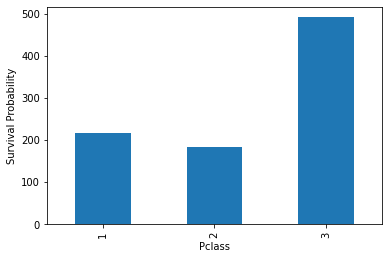

In [51]:
plt = train_data.Pclass.value_counts().sort_index().plot(kind='bar', title='')
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival Probability')

In [52]:
train_data[['Pclass', 'Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,216
2,184
3,491


In [53]:
train_data[['Pclass', 'Survived']].groupby('Pclass').sum()

,Survived
Pclass,
1,136
2,87
3,119


### Pclass - probability de survivre

Text(0, 0.5, 'Survival Probability')

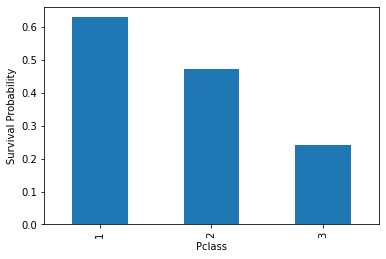

In [54]:
plt = train_data[['Pclass', 'Survived']].groupby('Pclass').mean().Survived.plot(kind='bar')
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival Probability')

- From the above results, we can say that, 1st class has high chance of surviving than the other two classes.

### Sex
- Majority of them are Male.

Text(0, 0.5, 'Passenger count')

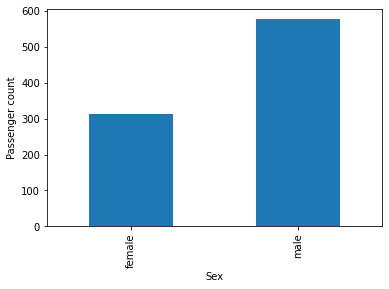

In [55]:
plt = train_data.Sex.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Sex')
plt.set_ylabel('Passenger count')

### Sexe - Probabilité de survie
- Comme nous le voyons, la probabilité de survie des femmes est plus élevée. Il est possible qu'ils aient donné plus de priorité aux femmes qu'aux hommes.

Text(0, 0.5, 'Survival Probability')

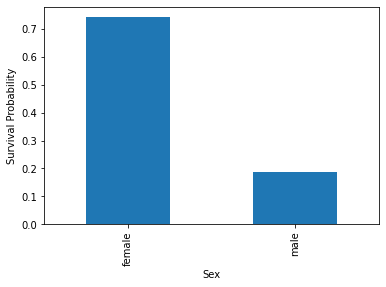

In [56]:
plt = train_data[['Sex', 'Survived']].groupby('Sex').mean().Survived.plot(kind='bar')
plt.set_xlabel('Sex')
plt.set_ylabel('Survival Probability')

### Embarqués
- La plupart d'entre eux sont originaires de Southampton(S).

Text(0, 0.5, 'Passenger count')

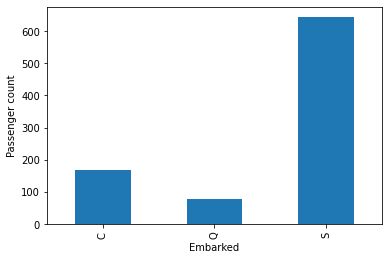

In [57]:
plt = train_data.Embarked.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Embarked')
plt.set_ylabel('Passenger count')

### Embarqués - Probabilité de survie
- Probabilité de survie : C > Q > S

Text(0, 0.5, 'Survival Probability')

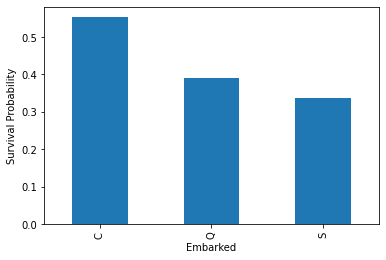

In [58]:
plt = train_data[['Embarked', 'Survived']].groupby('Embarked').mean().Survived.plot(kind='bar')
plt.set_xlabel('Embarked')
plt.set_ylabel('Survival Probability')

### SibSp - Siblings/Spouse

Text(0, 0.5, 'Passenger count')

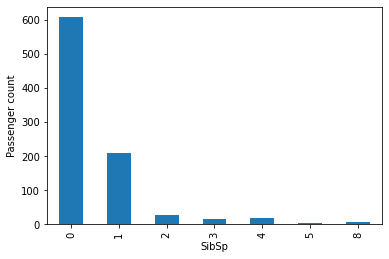

In [59]:
plt = train_data.SibSp.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('SibSp')
plt.set_ylabel('Passenger count')

- Comme on peut le voir, la majorité d'entre eux n'ont pas de frère ou de sœur ni de conjoint.

Text(0, 0.5, 'Survival Probability')

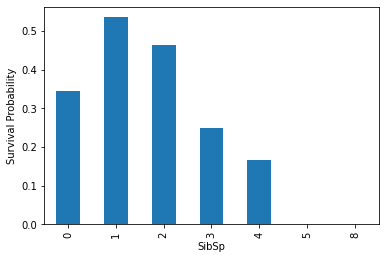

In [60]:
plt = train_data[['SibSp', 'Survived']].groupby('SibSp').mean().Survived.plot(kind='bar')
plt.set_xlabel('SibSp')
plt.set_ylabel('Survival Probability')

- Les passagers ayant un frère ou une sœur/un conjoint ont une probabilité de survie plus élevée.
- '1' > '2' > '0' > '3' > '4'

### Parch - Children/Parents

Text(0, 0.5, 'Passenger count')

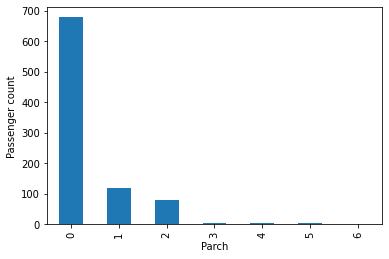

In [61]:
plt = train_data.Parch.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Parch')
plt.set_ylabel('Passenger count')

- Comme nous pouvons le constater, la majorité d'entre eux n'ont pas d'enfants/de parents.

Text(0, 0.5, 'Survival Probability')

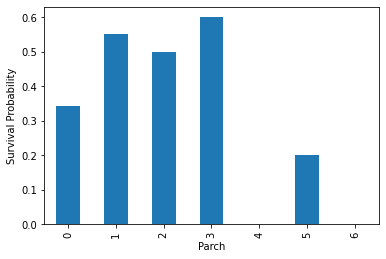

In [62]:
plt = train_data[['Parch', 'Survived']].groupby('Parch').mean().Survived.plot(kind='bar')
plt.set_xlabel('Parch')
plt.set_ylabel('Survival Probability')

- Les passagers ayant trois enfants/parents ont une probabilité de survie plus élevée.
- '3' > '1' > '2' > '0' > '5'

## Corrélations :
4) à l'aide de la fonction corr() de pandas, affichez une visualisation permettant de visualiser quelles variables sont corélées entre elles.

<AxesSubplot:>

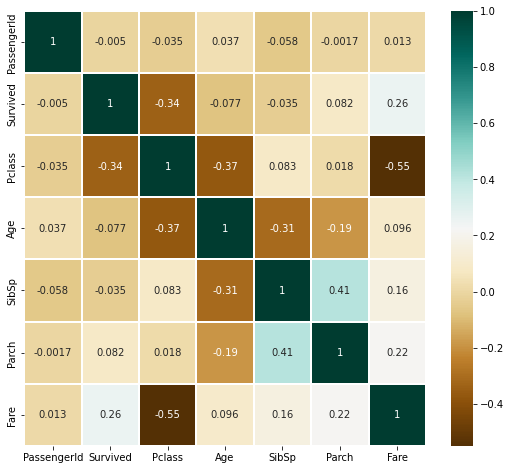

In [63]:
corr_matrix = train_data.corr()
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 8))
sns.heatmap(data = corr_matrix,cmap='BrBG', annot=True, linewidths=0.2)

# Preprocessing
Nous avons maintenant exploré notre jeu de données. Nous savons qu'il y a des lignes manquantes et des colonnes textuelles qu'il va falloir encoder. Voyons comment faire cela.

### Supprimer les colonnes inutiles
- Nous pouvons supprimer 'Ticket' et 'PassengerId', "cabin" et "name", car ils ne contribuent pas à la classe cible (au moins pas dans une première analyse).
- Supprimer 'Cabin' car il y a beaucoup de valeurs manquantes dans les données de formation et de test.

5) Utilisez la fonction drop(columns=["col1", col2", ...]) pour supprimer les colonnes souhaitées :

In [64]:
train_data = train_data.drop(columns=['Ticket', 'PassengerId', 'Cabin','Name'])

In [65]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Encoder les colonnes textuelles en nombre

6) A l'aide de la fonction OrdinalEncoder de sklearn, encoder les colonnes Sex et Embarked.

Les méhodes de skleanr fonctionnent en 4 étapes :

a) import des librairies :

from sklearn.preprocessing import ***

b) Instantiation d'un objet "preprocessor" :

 encoder = ***()

 c) Lecture des données initiales par notre objet (pas de retour)

 ***.fit(my_dataset)

 d) Application de mon objet pour propreccesser un jeu de données :               

new_dataset =  ***.transform(my_dataset_to_preprocess)



In [66]:
from sklearn.preprocessing import OrdinalEncoder

In [67]:
 encoder = OrdinalEncoder()
 encoder.fit(train_data[["Sex", "Embarked"]])
 train_data[["Sex", "Embarked"]] = encoder.transform(train_data[["Sex", "Embarked"]])

In [68]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.0,1,0,7.2500,2.0
1,1,1,0.0,38.0,1,0,71.2833,0.0
2,1,3,0.0,26.0,0,0,7.9250,2.0
3,1,1,0.0,35.0,1,0,53.1000,2.0
4,0,3,1.0,35.0,0,0,8.0500,2.0


### Traitement des valeurs manquantes

In [69]:
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

### Imputer les valeurs manquantes.
7) A l'aide de la libraire sklearn , identifier dans cette page https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute la méthode que vous souhaitez pour remplir les valeurs manquantes.
Attention sklearn ne prend pas en entrée un pd.Series mais un array ou np.Array. Convertissez donc votre Serie à l'aide de Series.values
Ensuite vérifiez la "shape" de sortie de l'objet, rechanger sa shape si besoin

In [70]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer( strategy='mean')
train_data['Embarked'] = imp_mean.fit_transform(train_data['Embarked'].values.reshape(-1,1))
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer( strategy='mean')
train_data['Age'] = imp_mean.fit_transform(train_data['Age'].values.reshape(-1,1))

In [71]:
train_data['Embarked'].isnull().sum()

0

### Missing values - 'Age'
- Let's find the columns that are useful to predict the value of Age.

In [72]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Il n'y a plus de données manquantes ! 

### Feature engineering : réer une nouvelle caractéristique "Taille de la famille" à partir des caractéristiques "SibSp" et "Parch".

8) Créer une colonne qui combine SibSp et Parch !

In [73]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] 

# Model 
Entrainement d'un premier modèle de ML !

8) Créez 2 variables X et y.
X contient toutes les colonnes sauf Survived, y contient Survived

In [74]:
X = train_data[["Sex", "Fare", "FamilySize"]]
# X = train_data[["Sex", "Age", "Fare", "FamilySize"]]
y = train_data["Survived"]

## Séparation du jeu de données

9) à l'aide de la fonction train_test_split de sklearn, séparez votre jeu de données en un jeu d'entrainement et de validation

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0)

10) 

10 ) A l'aide du modèle LogisticRegression, instancié un modèle et entrainez le ! 

from sklearn.linear_model import LogisticRegression

In [76]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression( random_state=0)
# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0)

11) Utilisez le modèle pour appliquer le modèle sur le jeu de données de validation

In [77]:
y_val_pred = logreg.predict(X_val)

Comment savoir si votre modèle est performant ?

Réponse au prochain épisode ;) (demain)

# Evaluation

Comme vu dans le cours, pour diagnostiquer notre modèle et conclure sur sa performance nous devons utiliser plusieurs outils, les metrics, qui vont nous permettre de mesurer sa performance. Le ML est un domaine empirique, il faut donc réalister ces étapes un certain nombre de fois jusqu'à obtenir un modèle convenable.

# accuracy

12 ) Utilisez la méthode accuracy de sklearn pour mesurer la performance de votre modèle sur le jeu d'entrainement ET le jeu de test : 

In [78]:
from sklearn.metrics import accuracy_score
y_train_pred = logreg.predict(X_train)
acc_score_train = accuracy_score(y_train, y_train_pred)
acc_score_pred = accuracy_score(y_val, y_val_pred)
print("acc train score : {} , acc val score : {}".format(acc_score_train, acc_score_pred))


acc train score : 0.7879213483146067 , acc val score : 0.7988826815642458


In [79]:
from sklearn.metrics import precision_score
prec_score_train = precision_score(y_train, y_train_pred)
prec_score_pred = precision_score(y_val, y_val_pred)
print("prec train score : {} , prec val score : {}".format(prec_score_train, prec_score_pred))


prec train score : 0.7520661157024794 , prec val score : 0.7538461538461538


In [42]:
from sklearn.metrics import recall_score
rec_score_train = recall_score(y_train, y_train_pred)
rec_score_pred = recall_score(y_val, y_val_pred)
print("rec train score : {} , rec val score : {}".format(rec_score_train, rec_score_pred))

rec train score : 0.6703296703296703 , rec val score : 0.7101449275362319


Que pouvez-vous en conclure ?

13) Générez une matrice de confusion sur les 2 jeux de données : entrainemenet et validatio à partir de cette fonction => https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [87]:
from sklearn.metrics import confusion_matrix
conf_train = confusion_matrix(y_train, y_train_pred)
conf_val = confusion_matrix(y_val, y_val_pred)


14) A partir de la matrice de confusion créée, utilisez la méthode ConfusionMatrixDisplay de sklearn pour l'afficher

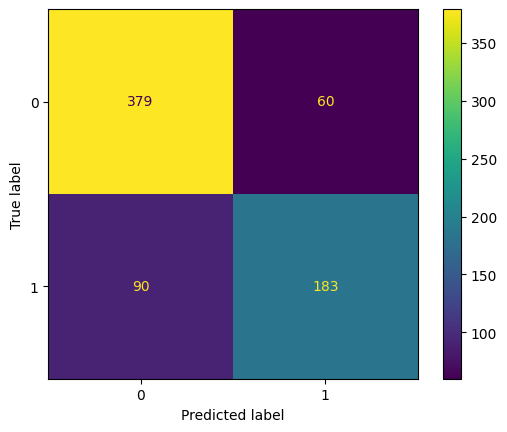

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_train,
                              display_labels=logreg.classes_)
disp.plot()
plt.show()


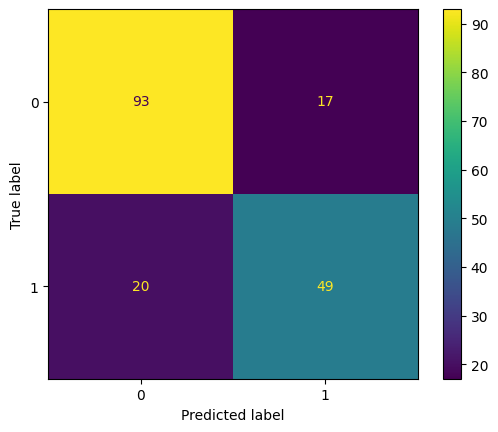

In [80]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_val,
                              display_labels=logreg.classes_)
disp.plot()
plt.show()

Mettons ça en pourcentage : 
Utilisez la foncrion suivante pour afficher en pourcent les 2 matrices de confusions

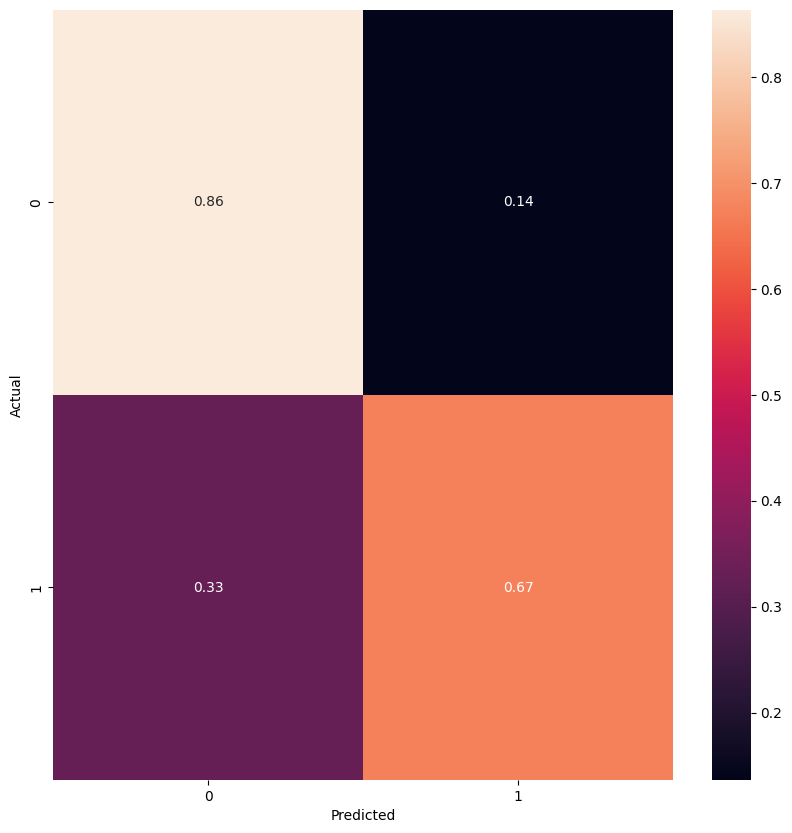

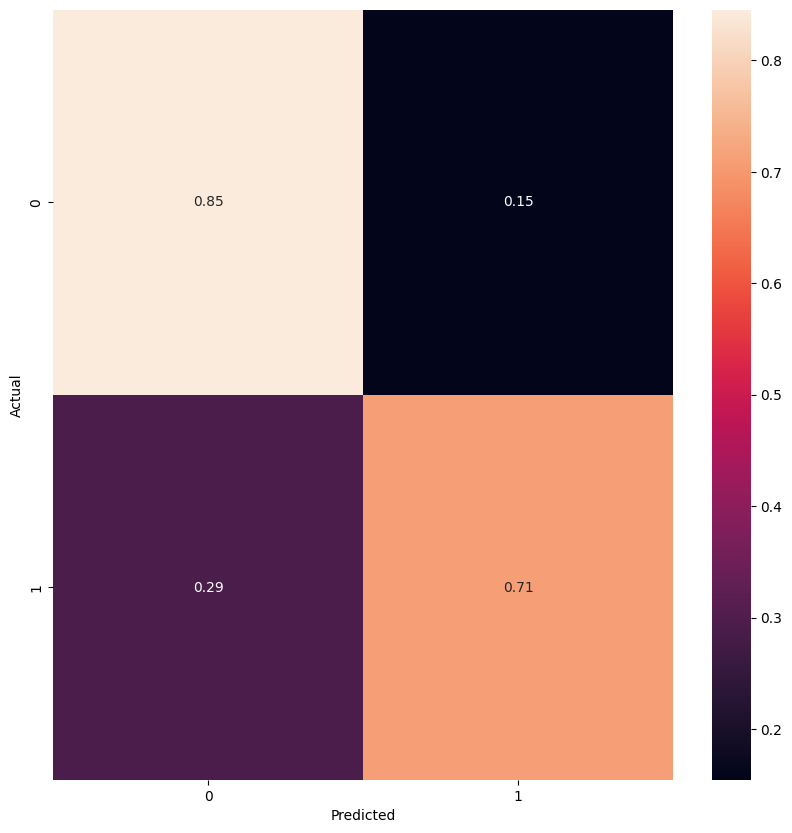

In [88]:
def show_cm_by_percent(cm):
  cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  fig, ax = plt.subplots(figsize=(10,10))
  sns.heatmap(cmn, annot=True, fmt='.2f')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show(block=False)

show_cm_by_percent(conf_train)
show_cm_by_percent(conf_val)

## Courbe ROC

In [89]:
logreg.predict_proba(X_val)

array([[0.80445016, 0.19554984],
       [0.81725875, 0.18274125],
       [0.92760489, 0.07239511],
       [0.07695717, 0.92304283],
       [0.34654868, 0.65345132],
       [0.7721259 , 0.2278741 ],
       [0.0556682 , 0.9443318 ],
       [0.07990906, 0.92009094],
       [0.67928285, 0.32071715],
       [0.25679468, 0.74320532],
       [0.85282135, 0.14717865],
       [0.24370358, 0.75629642],
       [0.81689727, 0.18310273],
       [0.31705988, 0.68294012],
       [0.12122374, 0.87877626],
       [0.25535487, 0.74464513],
       [0.8142142 , 0.1857858 ],
       [0.84159826, 0.15840174],
       [0.81635401, 0.18364599],
       [0.85181293, 0.14818707],
       [0.81001658, 0.18998342],
       [0.05689657, 0.94310343],
       [0.81691988, 0.18308012],
       [0.7710603 , 0.2289397 ],
       [0.25082122, 0.74917878],
       [0.1114154 , 0.8885846 ],
       [0.8166334 , 0.1833666 ],
       [0.25559455, 0.74440545],
       [0.263668  , 0.736332  ],
       [0.50020536, 0.49979464],
       [0.

In [103]:

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

def plot_roc(X, y, model):
  lr_probs = model.predict_proba(X)
  # keep probabilities for the positive outcome only
  lr_probs = lr_probs[:, 1]
  # calculate scores
  ns_probs = [0 for _ in range(len(y))]

  ns_auc = roc_auc_score(y, ns_probs)
  lr_auc = roc_auc_score(y, lr_probs)
  # summarize scores
  # calculate roc curves
  ns_fpr, ns_tpr, _ = roc_curve(y, ns_probs)
  lr_fpr, lr_tpr, _ = roc_curve(y, lr_probs)
  # plot the roc curve for the model
  pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
  pyplot.plot(lr_fpr, lr_tpr, marker='.')
  # axis labels
  pyplot.xlabel('False Positive Rate')
  pyplot.ylabel('True Positive Rate')
  # show the legend
  pyplot.legend()
  # show the plot
  pyplot.show()

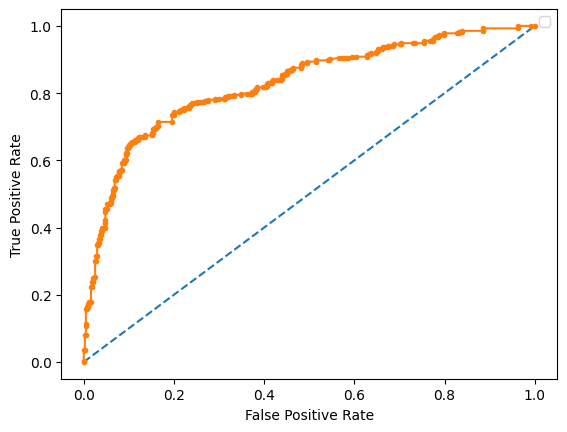

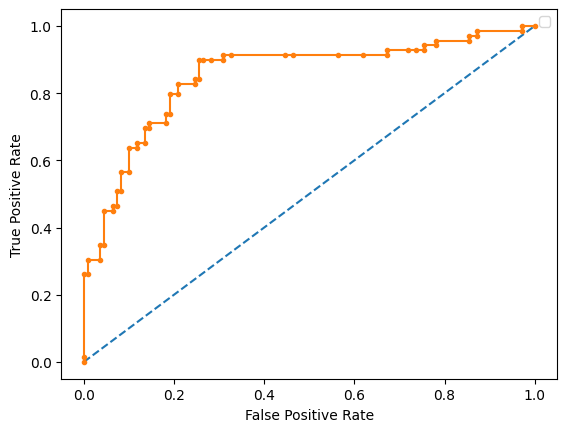

In [104]:
plot_roc(X_train, y_train, logreg)
plot_roc(X_val, y_val, logreg)

quelle serait la bonne valeur de seuil ?

15) reprenez le code existant pour appliquer le preprocessing sur le jeu de données Test et appliquez le le modèle. une fois le jeu de données de test inféré, avertiseez le formateur, il vous montrera comment obtenir le score sur kaggle.

In [105]:
from sklearn.model_selection import cross_validate 

logreg = LogisticRegression( random_state=0)
scores = cross_validate(logreg, X, y, cv=5, scoring=['accuracy', 'recall','precision'])


In [ ]:
print("")

In [107]:
def print_metrics(y_train, y_train_pred, y_val, y_val_pred):
    acc_score_train = accuracy_score(y_train, y_train_pred)
    acc_score_pred = accuracy_score(y_val, y_val_pred)
    print("acc train score : {} , acc val score : {}".format(acc_score_train, acc_score_pred))
    prec_score_train = precision_score(y_train, y_train_pred)
    prec_score_pred = precision_score(y_val, y_val_pred)
    print("prec train score : {} , prec val score : {}".format(prec_score_train, prec_score_pred))
    rec_score_train = recall_score(y_train, y_train_pred)
    rec_score_pred = recall_score(y_val, y_val_pred)
    print("rec train score : {} , rec val score : {}".format(rec_score_train, rec_score_pred))

Decision tree perf : 
acc train score : 0.8146067415730337 , acc val score : 0.8044692737430168
prec train score : 0.7949790794979079 , prec val score : 0.765625
rec train score : 0.6959706959706959 , rec val score : 0.7101449275362319


[Text(0.5, 0.875, 'X[0] <= 0.5\ngini = 0.473\nsamples = 712\nvalue = [439, 273]'),
 Text(0.25, 0.625, 'X[2] <= 3.5\ngini = 0.38\nsamples = 247\nvalue = [63, 184]'),
 Text(0.125, 0.375, 'X[1] <= 25.04\ngini = 0.32\nsamples = 220\nvalue = [44, 176]'),
 Text(0.0625, 0.125, 'gini = 0.435\nsamples = 125\nvalue = [40, 85]'),
 Text(0.1875, 0.125, 'gini = 0.081\nsamples = 95\nvalue = [4, 91]'),
 Text(0.375, 0.375, 'X[1] <= 165.963\ngini = 0.417\nsamples = 27\nvalue = [19, 8]'),
 Text(0.3125, 0.125, 'gini = 0.33\nsamples = 24\nvalue = [19, 5]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.75, 0.625, 'X[1] <= 26.269\ngini = 0.31\nsamples = 465\nvalue = [376, 89]'),
 Text(0.625, 0.375, 'X[2] <= 1.5\ngini = 0.241\nsamples = 335\nvalue = [288, 47]'),
 Text(0.5625, 0.125, 'gini = 0.211\nsamples = 301\nvalue = [265, 36]'),
 Text(0.6875, 0.125, 'gini = 0.438\nsamples = 34\nvalue = [23, 11]'),
 Text(0.875, 0.375, 'X[1] <= 26.775\ngini = 0.437\nsamples = 130\nvalue = [88, 42

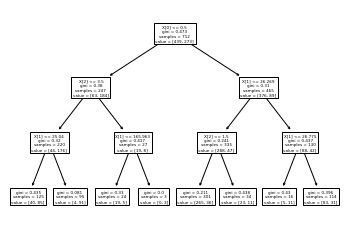

In [132]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
print("Decision tree perf : ")
clf = DecisionTreeClassifier(random_state=0, max_depth=3)
clf.fit(X_train, y_train )
y_train_pred = clf.predict(X_train)
y_val_pred =  clf.predict(X_val)
print_metrics(y_train, y_train_pred, y_val, y_val_pred)
tree.plot_tree(clf)


In [121]:
from sklearn.ensemble import RandomForestClassifier

print("RandomForestClassifier tree perf : ")
clf = RandomForestClassifier(max_depth=3, random_state=0, n_estimators=10)
clf.fit(X_train, y_train )
y_train_pred = clf.predict(X_train)
y_val_pred =  clf.predict(X_val)
print_metrics(y_train, y_train_pred, y_val, y_val_pred)
print("Features importances : {}".format(clf.feature_importances_))

RandomForestClassifier tree perf : 
acc train score : 0.800561797752809 , acc val score : 0.8100558659217877
prec train score : 0.8018433179723502 , prec val score : 0.7966101694915254
rec train score : 0.6373626373626373 , rec val score : 0.6811594202898551
Features importances : [0.56205273 0.26979627 0.168151  ]


In [133]:
from sklearn import svm

print("svm tree perf : ")
clf = svm.SVC()
clf.fit(X_train, y_train )
y_train_pred = clf.predict(X_train)
y_val_pred =  clf.predict(X_val)
print_metrics(y_train, y_train_pred, y_val, y_val_pred)

svm tree perf : 
acc train score : 0.6643258426966292 , acc val score : 0.7206703910614525
prec train score : 0.660377358490566 , prec val score : 0.8064516129032258
rec train score : 0.2564102564102564 , rec val score : 0.36231884057971014


In [134]:
from sklearn.ensemble import GradientBoostingClassifier

print("RandomForestClassifier tree perf : ")
clf = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0,   max_depth=4, random_state=0)
clf.fit(X_train, y_train )
y_train_pred = clf.predict(X_train)
y_val_pred =  clf.predict(X_val)
print_metrics(y_train, y_train_pred, y_val, y_val_pred)

RandomForestClassifier tree perf : 
acc train score : 0.8918539325842697 , acc val score : 0.8212290502793296
prec train score : 0.8656716417910447 , prec val score : 0.7681159420289855
rec train score : 0.8498168498168498 , rec val score : 0.7681159420289855


# Random Search 

In [136]:
random_grid

{'n_estimators': [10, 25, 41, 56, 72, 87, 103, 118, 134, 150],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [130]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 150, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 2,
                               verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X, y )
print(" Best params : {}".format(rf_random.best_params_))


y_train_pred = rf_random.best_estimator_.predict(X_train)
y_val_pred =  rf_random.best_estimator_.predict(X_val)
print_metrics(y_train, y_train_pred, y_val, y_val_pred)

Fitting 2 folds for each of 50 candidates, totalling 100 fits
 Best params : {'n_estimators': 87, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
acc train score : 0.8778089887640449 , acc val score : 0.8603351955307262
prec train score : 0.872 , prec val score : 0.8235294117647058
rec train score : 0.7985347985347986 , rec val score : 0.8115942028985508


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

print("RandomForestClassifier tree perf : ")
GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
...     max_depth=1, random_state=0).fit(X_train, y_train)
clf.fit(X_train, y_train )
y_train_pred = clf.predict(X_train)
y_val_pred =  clf.predict(X_val)
print_metrics(y_train, y_train_pred, y_val, y_val_pred)

In [140]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=87)